# Introduction

Pandas is most popular for data analysis, though it also allows us to visualize the results. This notebook is an effort to showcase plotting capabilities of Pandas without any use of external modules like matplotlib, plotly, seaborn etc. which are specifically designed for visualizations. These functions can come handy to develop quick understanding of data.

> Note that, it's assumed that DataFrame and Series are already known to the user and so have not been explained. 

> Data used here is Titanic data set, which is easily available across many sites.

In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./titanic/train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
283,284,1,3,"Dorking, Mr. Edward Arthur",male,19.0,0,0,A/5. 10482,8.0500,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S


The general syntax to draw a plot out of a dataframe is as follows:

**df['column'].plot.*type of plot*(*relevant parameters*)**

# Basic Plots

## Boxplot

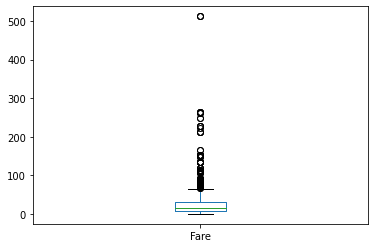

In [2]:
df[['Fare']].plot.box()

As see, 'Fare' has a highly skewed distribution. We can visualize log transformed value also for better understanding of its distribution.

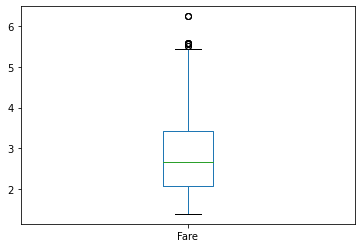

In [3]:
df[['Fare']].apply(np.log).plot.box()

It's also possible to horizontally align this boxplot for shrink visuals.

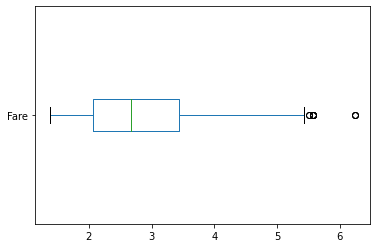

In [4]:
df[['Fare']].apply(np.log).plot.box(vert = False)

Similar graph can be plotted for multiple columns as well

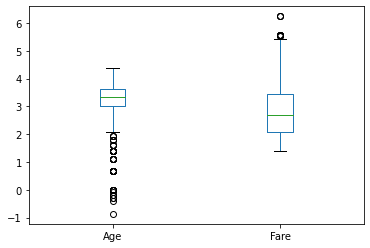

In [14]:
df[['Age','Fare']].apply(np.log, axis = 1).plot.box()

## Histogram

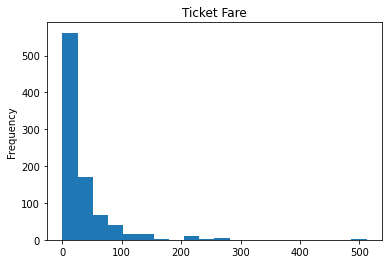

In [5]:
df['Fare'].plot.hist(bins = 20, title = 'Ticket Fare')

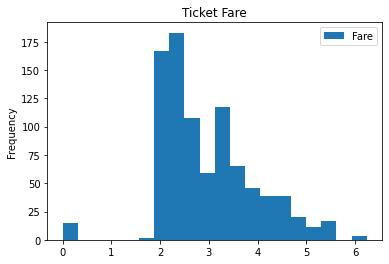

In [6]:
df[['Fare']].apply(lambda x: np.log(x+1)).plot.hist(bins = 20, title = 'Ticket Fare')
## Added 1 to each value to avoid negative values after log tranformation

## Correlation Matrix

In [7]:
corr = df[['Age', 'Fare']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Age,Fare
Age,1,0.096
Fare,0.096,1


## Scatter Plot

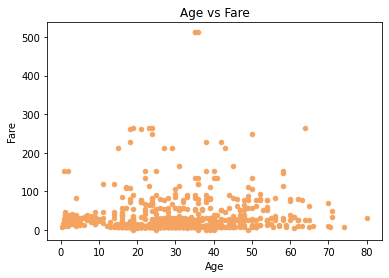

In [8]:
df.plot.scatter(x = 'Age', y = 'Fare', color = 'sandybrown', title = 'Age vs Fare')

# Additional Plotting Methods

## Scatter Matrix

This function takes whole dataframe as input, filters the continuous variables from it and plots their distribution and relationshps in a matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020622516668>,
      dtype=object)

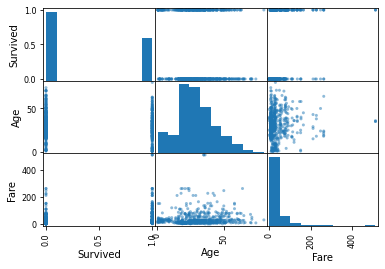

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['Survived', 'Age', 'Fare']])

This is a quick and dirty way of understanding cross-relationships of variables and, in few cases, can reveal good insights about overall features. 